## $\textit{Computational Astrophysics Tutorial VI}$
## $\textit{Xola Ndaliso (NDLXOL020)}$

### $\textit{2}$

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/home/xoks/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


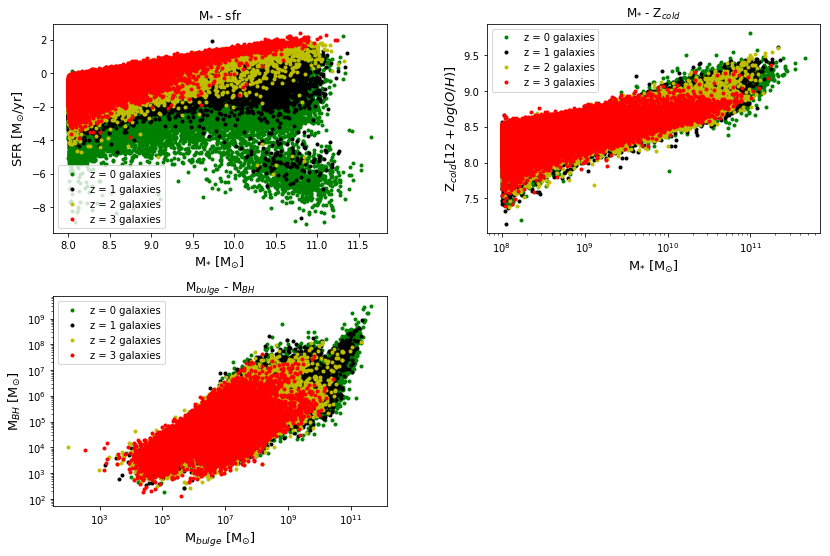

In [3]:
import numpy as np
import pylab as pl
import astropy.units as u
from astropy.io import fits

d_dat = {'M_st' : [], 'M_bh': [], 'Mbulge':[], 'Z_cold' : [], 'sfr': []}
c = ['g', 'k', 'y', 'r']

for i in range(4):
    
    file = fits.open('redshift_'+str(i))
    data = file[1].data
    
    d_dat['M_st'].append(data['Mbulge'] + data['Mdisk'])  #stellar mass for each file
    d_dat['Z_cold'].append(data['Zcold'])
    d_dat['sfr'].append(data['sfr'])
    d_dat['M_bh'].append(data['Mbh'])
    d_dat['Mbulge'].append(data['Mbulge'])
    
    pl.subplot(221, title = 'M$_{*}$ - sfr')
    pl.plot(np.log10(d_dat['M_st'][i]), np.log10(d_dat['sfr'][i]), str(c[i])+'.', label = 'z = '+str(i) +' ' + 'galaxies')
    #pl.xscale('log')
    pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
    pl.ylabel('SFR [M$_{\odot}$/yr]', fontsize = 13)
    pl.legend()
    
    pl.subplot(222, title = 'M$_{*}$ - Z$_{cold}$')
    pl.plot(d_dat['M_st'][i], d_dat['Z_cold'][i], str(c[i])+'.', label = 'z = '+str(i) +' ' + 'galaxies')
    pl.xscale('log')
    pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
    pl.ylabel('Z$_{cold} [12 + log(O/H)]$', fontsize = 13)

    pl.legend()
    pl.subplot(223, title = 'M$_{bulge}$ - M$_{BH}$')
    pl.loglog(data['Mbulge'], data['Mbh'], str(c[i])+'.', label = 'z = '+str(i) +' ' + 'galaxies')
    #pl.xscale('log')
    pl.xlabel('M$_{bulge}$ [M$_{\odot}$]', fontsize = 13)
    pl.ylabel('M$_{BH}$ [M$_{\odot}$]', fontsize = 13)
    pl.legend()
    
pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

### $\textit{3. Plotting the SMF}$

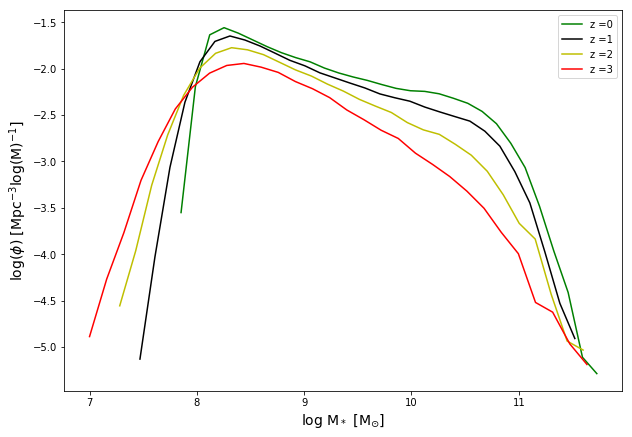

In [4]:
box_vol = (96*(0.673)**(-1))**3             #volume of the simulation box = length cubed 
SMF = [[] for _ in range(4)]                #empty lists for phi at each z
stellar_mass = [[] for _ in range(4)]       #empty lists for binned log masses


for i in range(4):
    R = np.random.normal(0, 1, len(d_dat['M_st'][i]))         #standard gaussian distribution
    log_Mst = (np.log10(d_dat['M_st'][i]) + 0.08*R*(1 + i))   #correcting for Eddington bias
    bins = pl.hist(log_Mst, bins = 30)                       #binning the logarithmic mass i.e log mass bins
    bin_width = bins[1][1:] - bins[1][:-1]                   #bin width
    weights = box_vol*bin_width                              #value for weighting
    SMF[i].append(np.log10(bins[0]/weights))                 #collecting log phi
    stellar_mass[i].append(bins[1])
    pl.close()

pl.figure(figsize = (10, 7))
for i in range(4):
    pl.plot(stellar_mass[i][0][1:], SMF[i][0], str(c[i])+'-', label = 'z =' + str(i))
    pl.ylabel('log($\phi$) [Mpc$^{-3}$log(M)$^{-1}$]', fontsize = 14)
    pl.xlabel('log M$_*$ [M$_{\odot}$]', fontsize = 14)
    pl.legend()
    
pl.savefig('SMF.eps', format = 'eps', dpi = 150)
pl.show()   

### $\textit{4. Model - Observations comparison}$

### $\textit{4a}$

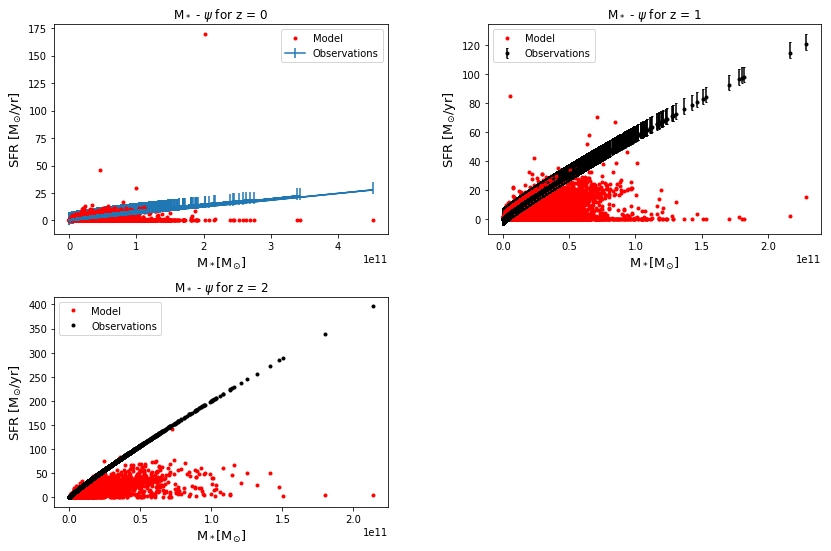

In [5]:
pl.subplot(221, title = 'M$_*$ - $\psi$ for z = 0')

err_0 = np.zeros((2, len(d_dat['M_st'][0])))    
for i in range(len(d_dat['M_st'][0])):

    err_0[0][i] = 3.7
    err_0[1][i] = 7.4
    
psi_z0 = (8.7)*(d_dat['M_st'][0]/1e+11)**(0.77)
pl.plot(d_dat['M_st'][0], d_dat['sfr'][0], 'r.', label = 'Model')
pl.errorbar(d_dat['M_st'][0], psi_z0, yerr = err_0,  label = 'Observations')
pl.xlabel('M$_*$[M$_{\odot}$]', fontsize = 13)
pl.ylabel('SFR [M$_{\odot}$/yr]', fontsize = 13)
pl.legend()

pl.subplot(222, title = 'M$_*$ - $\psi$ for z = 1')
err_1 = np.zeros((2, len(d_dat['M_st'][1])))
for i in range(len(d_dat['M_st'][1])):

    err_1[0][i] = 3.6
    err_1[1][i] = 7.2
    
psi_z1 = (7.2)*(d_dat['M_st'][1]/1e+10)**(0.9)
pl.plot(d_dat['M_st'][1], d_dat['sfr'][1], 'r.', label = 'Model')
pl.errorbar(d_dat['M_st'][1], psi_z1, yerr = err_1, fmt = 'k.', capsize = 0.7, label = 'Observations')
pl.xlabel('M$_*$[M$_{\odot}$]', fontsize = 13)
pl.ylabel('SFR [M$_{\odot}$/yr]', fontsize = 13)
pl.legend()

pl.subplot(223, title = 'M$_*$ - $\psi$ for z = 2')
psi_z2 = 200*(d_dat['M_st'][2]/1e11)**(0.9)
pl.plot(d_dat['M_st'][2], d_dat['sfr'][2], 'r.', label = 'Model')
pl.plot(d_dat['M_st'][2], psi_z2, 'k.', label = 'Observations')
pl.xlabel('M$_*$[M$_{\odot}$]', fontsize = 13)
pl.ylabel('SFR [M$_{\odot}$/yr]', fontsize = 13)
pl.legend()

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

### $\textit{4b}$

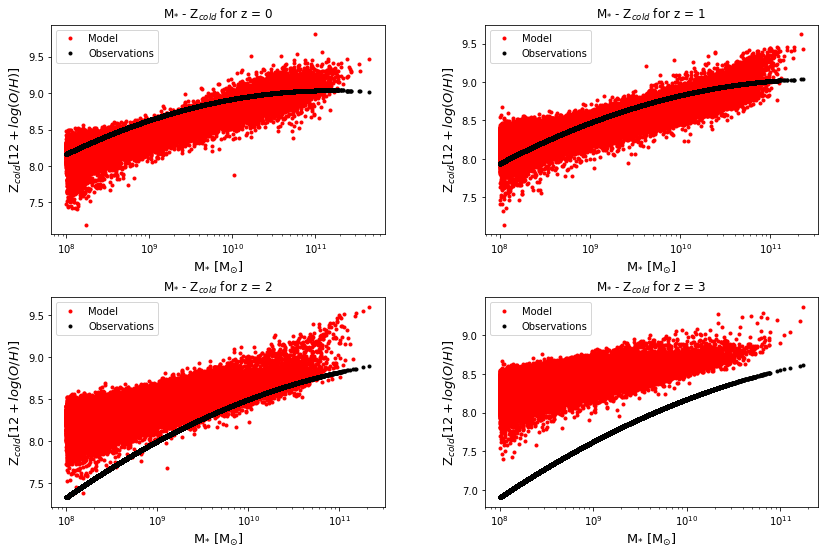

In [6]:
pl.subplot(221, title = 'M$_{*}$ - Z$_{cold}$ for z = 0')
Z_cold0 = -0.0864*(np.log10(d_dat['M_st'][0]) - 11.18)**2 + 9.04    #observed
pl.plot(d_dat['M_st'][0], d_dat['Z_cold'][0], 'r.', label = 'Model')
pl.plot(d_dat['M_st'][0], Z_cold0, 'k.', label = 'Observations')
pl.xscale('log')
pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
pl.ylabel('Z$_{cold} [12 + log(O/H)]$', fontsize = 13)
pl.legend()


pl.subplot(222, title = 'M$_{*}$ - Z$_{cold}$ for z = 1')
Z_cold1 = -0.0864*(np.log10(d_dat['M_st'][1]) - 11.57)**2 + 9.04
pl.plot(d_dat['M_st'][1], d_dat['Z_cold'][1], 'r.', label = 'Model')
pl.plot(d_dat['M_st'][1], Z_cold1, 'k.', label = 'Observations')
pl.xscale('log')
pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
pl.ylabel('Z$_{cold} [12 + log(O/H)]$', fontsize = 13)
pl.legend()

pl.subplot(223, title = 'M$_{*}$ - Z$_{cold}$ for z = 2')
Z_cold2 = -0.0864*(np.log10(d_dat['M_st'][2]) - 12.38)**2 + 8.99
pl.plot(d_dat['M_st'][2], d_dat['Z_cold'][2], 'r.', label = 'Model')
pl.plot(d_dat['M_st'][2], Z_cold2, 'k.', label = 'Observations')
pl.xscale('log')
pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
pl.ylabel('Z$_{cold} [12 + log(O/H)]$', fontsize = 13)
pl.legend()


pl.subplot(224, title = 'M$_{*}$ - Z$_{cold}$ for z = 3')
Z_cold3 = -0.0864*(np.log10(d_dat['M_st'][3]) - 12.67)**2 + 8.79
pl.plot(d_dat['M_st'][3], d_dat['Z_cold'][3], 'r.', label = 'Model')
pl.plot(d_dat['M_st'][3], Z_cold3, 'k.', label = 'Observations')
pl.xscale('log')
pl.xlabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)
pl.ylabel('Z$_{cold} [12 + log(O/H)]$', fontsize = 13)
pl.legend()


pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.show()

### $\textit{4c}$


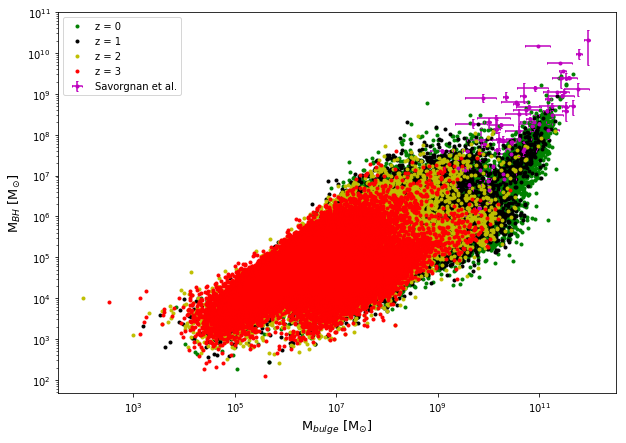

In [7]:
savo = fits.open('Savorgnan+16_BH_data.fits')

sav_data = savo[1].data

#empty arrays for errors 
MBH_err, MBULGE_err = np.zeros((2, len(sav_data['M_BH']))), np.zeros((2, len(sav_data['M_BULGE'])))

for i in range(len(sav_data['M_BH'])):
    
    MBH_err[0][i] = sav_data['M_BHM'][i]        #black-hole mass errors
    MBH_err[1][i] = sav_data['M_BHP'][i]

    MBULGE_err[0][i] = sav_data['M_BULGEM'][i]  #bulge -mass errors
    MBULGE_err[1][i] = sav_data['M_BULGEP'][i]
    
pl.figure(figsize = (10, 7))  

for i in range(4):
    pl.plot(d_dat['Mbulge'][i], d_dat['M_bh'][i], str(c[i])+'.', label = 'z = '+str(i))   #Mbh-Mblge for all z 
    
pl.errorbar(sav_data['M_BULGE'], sav_data['M_BH'], xerr = MBULGE_err, yerr = MBH_err, color = 'm', 
            fmt = '.', capsize = 0.9, label = 'Savorgnan et al.')  #plotting Mbh-Mblge relation from Savorgan
pl.xscale('log')
pl.yscale('log')
pl.xlabel('M$_{bulge}$ [M$_{\odot}$]', fontsize = 13)
pl.ylabel('M$_{BH}$ [M$_{\odot}$]', fontsize = 13)
pl.legend()
pl.show()

### $\textit{4d}$

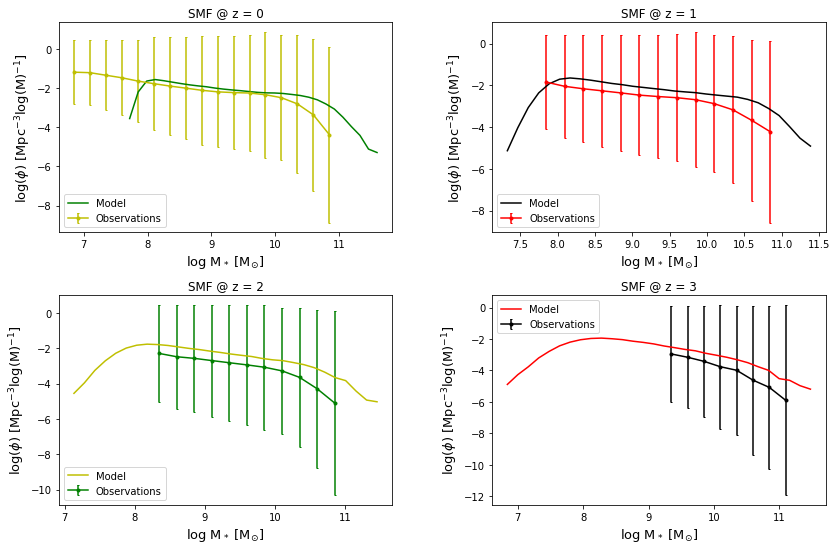

In [8]:
c2 = ['y', 'r', 'g', 'k']

for i in range(4):
    Obs_smf = fits.open('SMF_obs_z'+str(i)+'.fits')     #reading the SMF files
    smf_data = Obs_smf[1].data                          #reading data 
    SMF_obs = np.log10(smf_data['PHI']*((0.673)**3))    #log(phi) - stellar mass function in Mpc^-3 log(M)^-1
    lg_Ms = smf_data['LOGMSTAR'] - np.log10((0.673)**-2)          #log Mstellar in Msun
    SMF_err = np.log10(smf_data['PHI_ERR']*((0.673)**3))  #error in SMF
    pl.subplot(220 + i + 1, title = 'SMF @ z = '+str(i))
    pl.plot(stellar_mass[i][0][0:-1], SMF[i][0], str(c[i])+'-', label = 'Model')  #plotting model SMF
    pl.errorbar(lg_Ms, SMF_obs, yerr = SMF_err, fmt = str(c2[i]), marker = '.', capsize = 0.9,label = 'Observations') 
    pl.ylabel('log($\phi$) [Mpc$^{-3}$log(M)$^{-1}$]', fontsize = 13)
    pl.xlabel('log M$_*$ [M$_{\odot}$]', fontsize = 13)
    pl.legend()

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)    
pl.show()

### $\textit{5}$

$\textbf{.}$ The model matches fairly well the relation of M$_*$ - $\psi$ only for redshift = 0. For redshifts 1 and 2 on the other hand the model does not match well the observations. Looking at the M$_*$ - Z$_{cold}$ relation the model mathches the observations quite good for the first three redshifts i.e 0, 1, 2. For redshift 3 the model is signficantly different from the observations. In the M$_{BH}$ - M$_{bulge}$ relation, it is plausible to say that the model fairly describes the observations i.e Savorgnan et al. (2016), since the observations are taking the same trend taken by the model. For the stellar mass function, the model differs significantly from the observations.

$\textbf{.}$ The small volume of the simulation might make the massive end of the stellar mass function of the simulation less reliable. This results from weighting the few number of galaxies by the small volume there by resulting to a huge number of galaxies per volume per mass which is actually not the case.

$\textbf{.}$ One way to improve L-Galaxies would probably be to revisit the cosmological model used as there are ongoing discussions on what cosmological model should be used. There other way would maybe to revisit the criterion used to select galaxies with resolved DM halo, thus maybe the number of galaxies would decrease there by leading to relation that are more bound together rather than the very wide relations found in this work.